In [1]:
# load up modules
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from scipy import stats

# load for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#models
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#date time
import datetime

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv(r"C:\Users\Swood\OneDrive\Northwestern\422 ML\Digit_Recognizer\train.csv")
df_test = pd.read_csv(r"C:\Users\Swood\OneDrive\Northwestern\422 ML\Digit_Recognizer\test.csv")

df.shape
df_test.shape


(42000, 785)

(28000, 784)

In [4]:
df.info()

df.dtypes.value_counts()

# TODO: Use the head() method to inspect the first five (or more) rows of the data

df.head()

# TODO: Use the tail() method to inspect the last five (or more) rows of the data

df.tail()

df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


int64    785
dtype: int64

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<div style="background-color:lightblue;">
Prepare data for modeling
</div>

In [80]:
#Separate label from data


labels = df['label']

y = df['label']

trainimages = df.drop("label", axis = 1)

#save test label

image_id = range(1, 28001)

trainimages.head()

image_id



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


range(1, 28001)

Text(0.5, 1.0, 'Distribution of Labels')

<AxesSubplot:title={'center':'Distribution of Labels'}, xlabel='label', ylabel='Count'>

Skew: 0.026479251883621335
Kurtosis: -1.2525053342308414


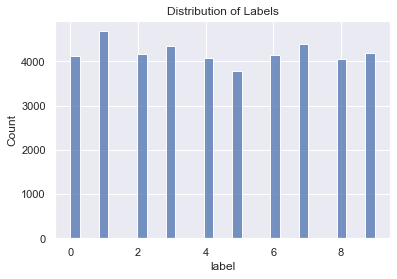

In [6]:
plt.title("Distribution of Labels")
sns.histplot(labels);

print( 'Skew: {}'.format(skew( labels, bias=False) ))

print( 'Kurtosis: {}'.format(kurtosis( labels, bias=False) ))

In [7]:
df.isnull().sum().sort_values(ascending=False).head(20)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
pixel521    0
pixel522    0
pixel523    0
pixel524    0
pixel525    0
pixel526    0
pixel527    0
pixel528    0
pixel529    0
pixel530    0
pixel531    0
pixel532    0
pixel533    0
pixel534    0
dtype: int64

<div style="background-color:lightblue;">
Random Forest Model
</div>

In [8]:
# fit model

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 777)

# fit the model to the training set and record time to fit

start=datetime.datetime.now()

clf.fit(trainimages, labels)

end=datetime.datetime.now()
print(end-start)

RandomForestClassifier(random_state=777)

0:00:22.874297


In [9]:
pred1 = clf.predict(df_test)

submit = pd.DataFrame()

submit['ImageId'] = image_id
submit['Label'] = pred1

submit.to_csv('submission1.csv',index=False)

submit.head()

submit.shape

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


(28000, 2)

In [10]:
# Tune Random Forest Model
# Hyper parameters to tune:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]


#Criteria for measuring quality of split
criteria = ['gini', 'entropy']


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criteria}


In [11]:
# Import halving grid search function to speed up tuning over grid search cv:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state = 777)


search = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

start=datetime.datetime.now()

search.fit(trainimages, labels)

end=datetime.datetime.now()
print(end-start)

search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=777),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=42, verbose=2)

0:06:04.480264


{'n_estimators': 183,
 'max_features': 'sqrt',
 'max_depth': 32,
 'criterion': 'gini'}

In [12]:
pred = search.predict(df_test)

submit = pd.DataFrame()

submit['ImageId'] = image_id
submit['Label'] = pred

submit.to_csv('submission2.csv',index=False)

submit.head()

submit.shape

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


(28000, 2)

<div style="background-color:lightgreen;">
Combine Data Sets for PCA
</div>

In [13]:
#merge data into one dataframe

df_comb = pd.concat([trainimages, df_test])

df_comb.head()
df_comb.shape

#look at value distribution to see if scaling is necessary

df_comb['pixel774'].value_counts()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(70000, 784)

0      69887
253       12
3          6
252        3
6          3
       ...  
68         1
226        1
67         1
163        1
95         1
Name: pixel774, Length: 78, dtype: int64

<Figure size 1080x720 with 0 Axes>

<BarContainer object of 784 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal component index')

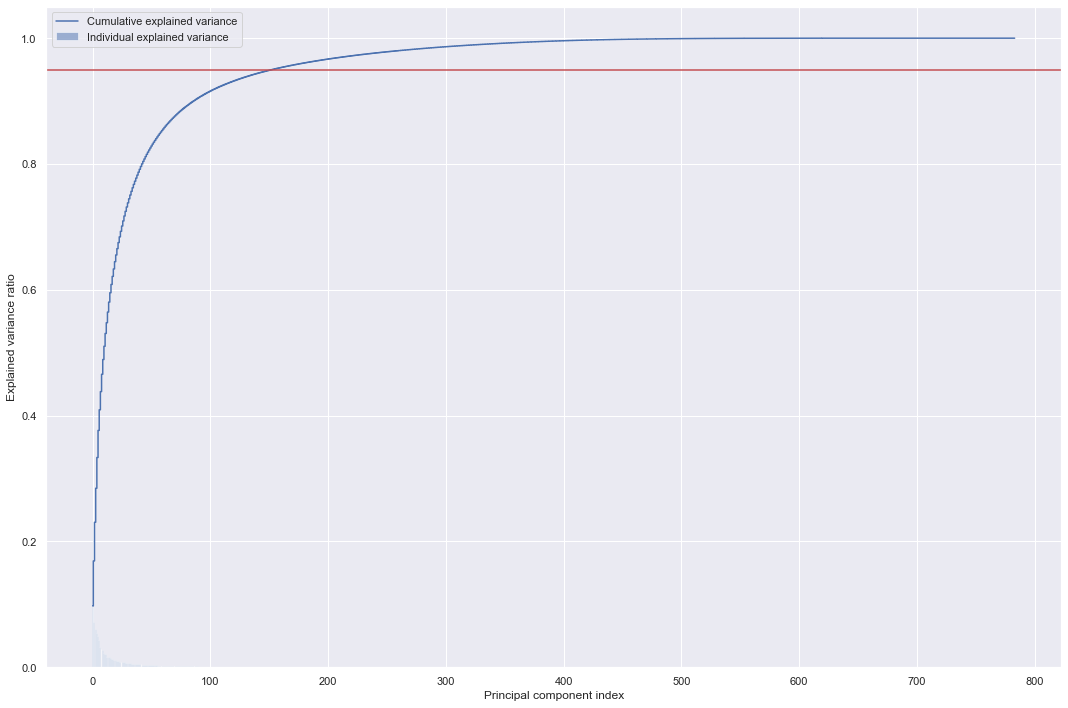

In [14]:
#conduct pca on explanatory variables

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA()

df_pca = pca.fit_transform(df_comb)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(15,10))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.tight_layout()
plt.show()

In [15]:
#fit so 95% of variance is explained

start=datetime.datetime.now()

pca = PCA(n_components = 0.95)
pca.fit(df_comb)

end=datetime.datetime.now()
print(end-start)

print('Number of components to explain 95% Variance is',pca.n_components_)

PCA(n_components=0.95)

0:00:04.189208
Number of components to explain 95% Variance is 154


In [16]:
# Put into Dataframe

columns = ['pca_comp_%i' % i for i in range(154)]
df_pca  = pd.DataFrame(pca.transform(df_comb), columns=columns, index=df_comb.index)
df_pca.head()

df_pca.shape


,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_144,pca_comp_145,pca_comp_146,pca_comp_147,pca_comp_148,pca_comp_149,pca_comp_150,pca_comp_151,pca_comp_152,pca_comp_153
0,-675.625509,-682.915808,186.498640,127.289953,-78.365677,488.125117,-692.041655,82.896481,327.166953,203.119568,...,-38.562372,50.957580,17.017551,-5.277069,18.204052,-9.352243,-31.701080,-10.899018,-16.321949,63.566239
1,1690.625135,-402.068266,-488.585115,346.731780,-453.005179,737.156898,662.036984,-181.674905,-4.001588,67.466851,...,-42.450789,9.898692,14.207084,-29.815676,-66.609418,-0.928763,6.923119,-26.579554,-7.829073,-42.798186
2,-890.131113,-275.559563,79.442720,72.924640,-471.184005,-334.469890,438.114151,-297.464086,-196.553054,-20.046388,...,13.130675,-20.447820,38.520990,9.372011,52.771912,-13.503393,24.877741,0.547651,-18.987404,-9.329702
3,-158.531459,302.925905,-66.531553,766.136173,-425.946836,150.842902,-299.858993,276.099877,-57.491297,-286.775435,...,15.712865,-76.442828,110.721354,41.938794,65.513436,-76.629422,7.539518,-8.410661,-3.808165,-44.298437
4,1908.674338,-492.370459,-525.761544,203.054935,-663.649909,990.467203,572.753923,-256.950735,127.437184,176.518499,...,34.296855,6.831532,0.346457,-34.037500,-61.297883,66.089466,-61.341104,61.185672,-86.029922,-41.986822


(70000, 154)

In [17]:
# Break out PCA df into pca df for training:

pca_train = df_pca.iloc[:df.shape[0]]

pca_test = df_pca[df.shape[0]:]

pca_train.shape
pca_test.shape

(42000, 154)

(28000, 154)

In [18]:
#Fit Random Forest Model to PCA df
clf = RandomForestClassifier(random_state = 777)

# fit the model to the training set and record time to fit

start=datetime.datetime.now()

clf.fit(pca_train, labels)

end=datetime.datetime.now()
print(end-start)


RandomForestClassifier(random_state=777)

0:00:45.508019


In [19]:
pred = clf.predict(pca_test)

submit = pd.DataFrame()

submit['ImageId'] = image_id
submit['Label'] = pred

submit.to_csv('submission3.csv',index=False)

submit.head()

submit.shape

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


(28000, 2)

PCA reduced random forest performed worse than original models.

<div style="background-color:lightblue;">
K Means Clustering
</div>

In [39]:

x = pca_train.astype(float)

from sklearn.cluster import MiniBatchKMeans, KMeans

n_digits = len(np.unique(labels))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(x)
len(kmeans.labels_)

y_pred = kmeans.labels_



10


C:\Users\Swood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

42000

[6,
 4,
 7,
 5,
 4,
 5,
 1,
 5,
 9,
 2,
 9,
 8,
 7,
 2,
 2,
 7,
 9,
 4,
 1,
 2,
 9,
 3,
 2,
 4,
 6,
 2,
 3,
 8,
 1,
 1,
 9,
 0,
 5,
 8,
 3,
 7,
 9,
 7,
 6,
 1,
 2,
 7,
 0,
 1,
 5,
 3,
 5,
 1,
 8,
 1,
 0,
 2,
 7,
 0,
 4,
 5,
 6,
 2,
 8,
 7,
 7,
 6,
 0,
 4,
 3,
 2,
 0,
 2,
 7,
 5,
 9,
 1,
 3,
 2,
 6,
 8,
 1,
 7,
 0,
 7,
 6,
 8,
 9,
 1,
 6,
 7,
 8,
 5,
 0,
 5,
 2,
 3,
 0,
 3,
 5,
 1,
 7,
 3,
 4,
 2,
 1,
 6,
 8,
 1,
 8,
 9,
 6,
 2,
 4,
 3,
 4,
 3,
 3,
 0,
 4,
 0,
 8,
 6,
 7,
 2,
 5,
 8,
 1,
 3,
 6,
 3,
 1,
 3,
 3,
 4,
 5,
 2,
 6,
 9,
 6,
 6,
 1,
 2,
 0,
 5,
 7,
 4,
 7,
 5,
 8,
 8,
 2,
 9,
 8,
 8,
 2,
 8,
 6,
 4,
 8,
 2,
 8,
 4,
 0,
 3,
 3,
 1,
 8,
 1,
 7,
 1,
 7,
 2,
 5,
 3,
 8,
 9,
 8,
 1,
 9,
 5,
 2,
 9,
 3,
 5,
 1,
 2,
 6,
 5,
 8,
 6,
 9,
 0,
 4,
 3,
 6,
 5,
 1,
 5,
 3,
 4,
 4,
 0,
 2,
 3,
 4,
 9,
 3,
 4,
 4,
 5,
 1,
 3,
 8,
 7,
 1,
 1,
 2,
 1,
 9,
 0,
 7,
 3,
 6,
 2,
 9,
 7,
 6,
 1,
 6,
 2,
 1,
 3,
 6,
 3,
 2,
 3,
 2,
 6,
 7,
 5,
 6,
 0,
 0,
 3,
 4,
 3,
 8,
 2,
 5,
 9,
 0,
 6,
 4,
 6,


In [86]:
#Turn Y into an array so it will work with below functions

Y = np.array(y)

MiniBatchKMeans(n_clusters=10)

In [21]:
# create a dataframe comparing assigned clusters to labels
labels_dict = pd.DataFrame(labels)
#labels_dict.columns = ['labels', 'cluster']

labels_dict['cluster'] = y_pred.tolist()

labels_dict.head()

pd.set_option('display.max_rows', None)

labels_dict.groupby(['label', 'cluster'])['cluster'].agg('count')

,label,cluster
0,1,4
1,0,8
2,1,4
3,4,9
4,0,8


label  cluster
0      0           195
       1             4
       2            29
       3          1156
       4             6
       5            47
       6            11
       7          1279
       8          1390
       9            15
1      0           128
       1             5
       2             4
       4          4513
       5            11
       6            13
       9            10
2      0           798
       1            45
       2           141
       3            68
       4           522
       5          1779
       6           650
       7            58
       8             7
       9           109
3      0           576
       1            26
       2          2884
       3            18
       4           243
       5            50
       6           396
       7            22
       8             5
       9           131
4      0           129
       1          1267
       2             1
       3             1
       4           171
       5           

In [46]:
#assign cluster to correct label

def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
 # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
 # append actual labels for each point in cluster
        labels.append(actual_labels[index])
 # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
 # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
 # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
 # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels



In [23]:
def infer_data_labels(X_labels, cluster_labels):
 # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

In [87]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(pca_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)


In [89]:
print(predicted_labels[:20])
print(Y[:20])


[1 0 1 5 0 5 7 5 8 3 8 7 1 3 3 1 8 0 7 3]
[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 5]


In [90]:
#Optimize and Evaluate the Cluser Algorithm

from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))


In [91]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(pca_train)
    
    # print cluster metrics
    calculate_metrics(estimator, pca_train, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

C:\Users\Swood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

Number of Clusters: 10
Inertia: 101006962997.81873
Homogeneity: 0.45075706813699024
Accuracy: 0.5434523809523809



C:\Users\Swood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=16)

Number of Clusters: 16
Inertia: 93669112478.92953
Homogeneity: 0.5643499932442094
Accuracy: 0.652952380952381



C:\Users\Swood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=36)

Number of Clusters: 36
Inertia: 82496589059.3322
Homogeneity: 0.6733801424586948
Accuracy: 0.7495



C:\Users\Swood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=64)

Number of Clusters: 64
Inertia: 75556275707.68141
Homogeneity: 0.7263435962954576
Accuracy: 0.7945714285714286



C:\Users\Swood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=144)

Number of Clusters: 144
Inertia: 67064676917.02908
Homogeneity: 0.8127050962497702
Accuracy: 0.8800238095238095



C:\Users\Swood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=256)

Number of Clusters: 256
Inertia: 61897876511.822754
Homogeneity: 0.8436300661299893
Accuracy: 0.8955238095238095



More clusers seem to perform better than fewer clusters, so lets make our predictions off of kmeans with 256 clusters.

In [107]:
# Make Predictions with tuned kmeans model

start=datetime.datetime.now()

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(pca_train)


cluster_labels = infer_cluster_labels(kmeans, Y)

end=datetime.datetime.now()
print(end-start)

# predict labels for testing data
test_clusters = kmeans.predict(pca_test)
predicted_labels = infer_data_labels(kmeans.predict(pca_test), cluster_labels)

C:\Users\Swood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=256)

0:00:02.945243


In [95]:
predicted_labels

array([2, 0, 9, ..., 3, 9, 2], dtype=uint8)

In [98]:
#Create Submission


submit = pd.DataFrame()

submit['ImageId'] = image_id
submit['Label'] = predicted_labels

submit.to_csv('submission4.csv',index=False)

submit.head()

submit.shape

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


(28000, 2)

This earned a score of .89175, which is my worstg score so far.

The experiment we have proposed has a major design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. 

In [101]:
# Conduct PCA on training data set and then apply to test data set:
#fit so 95% of variance is explained

start=datetime.datetime.now()

pca = PCA(n_components = 0.95)
x_transformed = pca.fit_transform(trainimages)

end=datetime.datetime.now()
print(end-start)

print('Number of components to explain 95% Variance is',pca.n_components_)


0:00:02.379308
Number of components to explain 95% Variance is 154


In [102]:
#Fit Random Forest Model to PCA df
clf = RandomForestClassifier(random_state = 777)

# fit the model to the training set and record time to fit

start=datetime.datetime.now()

clf.fit(x_transformed, labels)

end=datetime.datetime.now()
print(end-start)


RandomForestClassifier(random_state=777)

0:00:45.055081


In [103]:
# PCA transform test data and make predictions

xtest_transformed = pca.transform(df_test)

pred = clf.predict(xtest_transformed)

pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [105]:
#Create Submission

submit = pd.DataFrame()

submit['ImageId'] = image_id
submit['Label'] = pred

submit.to_csv('submission5.csv',index=False)

submit.head()

submit.shape

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


(28000, 2)

This performed similarly to the other pca transformed submission.

In [108]:
model = ['Random_Forest', 'PCA_Red_RF', 'KMeans', 'PCA_Red_RF2']

scores = [.96510, .94385, .89175, .94371]

fit_time = [22.87, 45.51, 2.95, 45.05]



summary_df = pd.DataFrame(list(zip(model, scores, fit_time)))

summary_df.columns = ['Model', 'Accuracy', 'Fit Seconds']

summary_df

,Model,Accuracy,Fit Seconds
0,Random_Forest,0.96510,22.87
1,PCA_Red_RF,0.94385,45.51
2,KMeans,0.89175,2.95
3,PCA_Red_RF2,0.94371,45.05
